In [1]:
import pandas as pd

reactions = pd.read_csv("/content/drive/MyDrive/adverse_events.csv")

reactions.head()

,reaction
0,Arthralgia
1,Back pain
2,Blood pressure decreased
3,Blood pressure fluctuation
4,Blood pressure increased


In [2]:
pt_list = reactions['reaction'].dropna().to_list()

print(len(pt_list))

2838


In [3]:
from sentence_transformers import SentenceTransformer

# Use a biomedical model for better term understanding
model = SentenceTransformer('pritamdeka/BioBERT-mnli-snli-scinli-scitail-mednli-stsb')

pt_embeddings = model.encode(pt_list, show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.47k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/691 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/412 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/89 [00:00<?, ?it/s]

In [4]:
##clustering PTs using kmeans

from sklearn.cluster import KMeans

k = 20  # Try different values based on Silhouette Score
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pt_embeddings)

pt_cluster_df = pd.DataFrame({
    'preferred_term': pt_list,
    'cluster': labels
})

In [5]:
pt_cluster_df

,preferred_term,cluster
0,Arthralgia,14
1,Back pain,1
2,Blood pressure decreased,9
3,Blood pressure fluctuation,5
4,Blood pressure increased,8
...,...,...
2833,Artificial menopause,4
2834,Noninfective gingivitis,2
2835,Primary biliary cholangitis,17
2836,Therapeutic drug monitoring analysis not perfo...,13


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


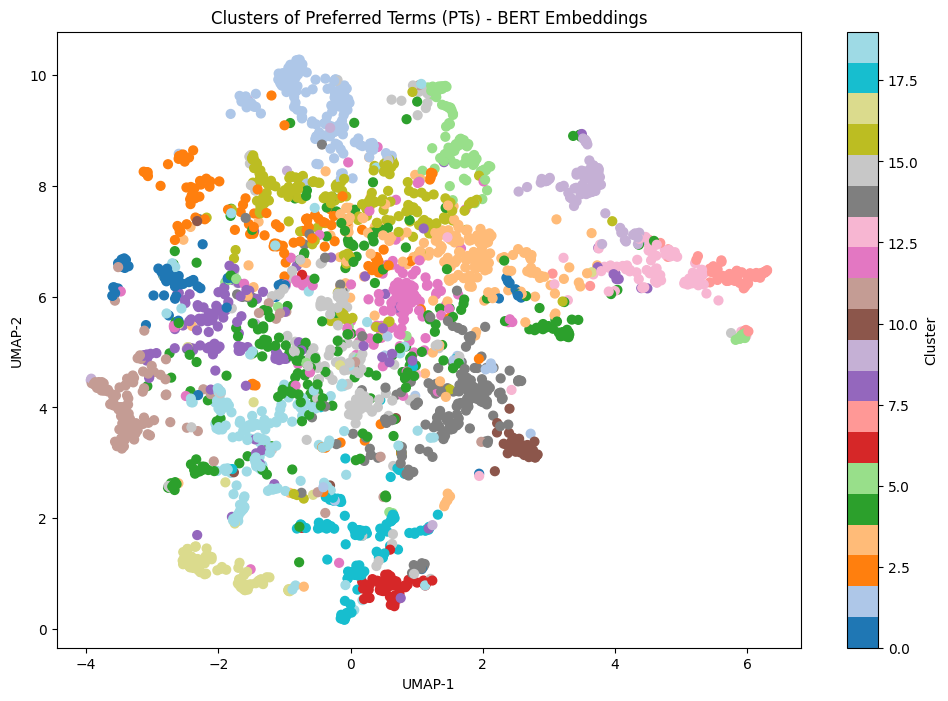

In [6]:
##Visualize using umap
import umap.umap_ as umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_neighbors=15, random_state=42)
embedding_2d = reducer.fit_transform(pt_embeddings)

plt.figure(figsize=(12, 8))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=labels, cmap='tab20', s=40)
plt.title('Clusters of Preferred Terms (PTs) - BERT Embeddings')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar(label='Cluster')
plt.show()

In [7]:
pt_cluster_df.loc[pt_cluster_df['cluster']==1]

,preferred_term,cluster
1,Back pain,1
7,Trigger finger,1
83,Bone disorder,1
88,Osteoarthritis,1
89,Osteonecrosis,1
...,...,...
2712,Pelvic fracture,1
2715,Musculoskeletal injury,1
2773,Foot amputation,1
2783,Radiculopathy,1


In [8]:
pt_cluster_df.loc[pt_cluster_df['cluster']==2]

,preferred_term,cluster
24,Sputum discoloured,2
53,Nasopharyngitis,2
56,Sinus disorder,2
58,Tooth disorder,2
69,Hypoaesthesia oral,2
...,...,...
2764,Lip oedema,2
2766,Sinus headache,2
2775,Trigeminal neuralgia,2
2806,Lip disorder,2


In [9]:
len(pt_cluster_df.loc[pt_cluster_df['cluster']==2])

153

In [10]:
len(pt_cluster_df.loc[pt_cluster_df['cluster']==1])

187